In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# df.plot.line(x='record_point', y=['rotation_different','reward'],figsize=(12, 5), lw=1) 
df_inflat = pd.read_csv('the_throw_in_original_data_rotation.csv') 
df_indistrub = pd.read_csv('the_throw_in_disturb_data_rotation.csv') 
df_inuneven = pd.read_csv('the_throw_in_uneven_data_rotation.csv')
df_inheavy = pd.read_csv('the_throw_with_heavy_opps_data_rotation.csv')

In [98]:
def showPlotLine(df,name):
    # Create figure and axis objects
    fig, ax1 = plt.subplots(figsize=(15, 5))

    # Plotting the first Y axis for total rotation different
    ax1.set_ylabel('animator_rotation', color='orange')
    line1,= ax1.plot(df['record_point'], df['animator_rotation'], color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')

    # Creating a second Y axis for the agent rotation
    ax2 = ax1.twinx()
    ax2.set_ylabel('agent_rotation', color='b')
    line2, = ax2.plot(df['record_point'], df['agent_rotation'], color='b')
    ax2.tick_params(axis='y', labelcolor='b')    

    # #Creating a third Y axis for the animator rotation
    # ax3 = ax1.twinx()
    # ax3.set_ylabel('animator_rotation', color='g')
    # line3, = ax3.plot(df['record_point'], df['animator_rotation'], color='g')
    # ax3.tick_params(axis='y', labelcolor='g')

    # Combine legends from all axes

    line1.set_label('animator_rotation')
    line2.set_label('agent_rotation')
    # line3.set_label('animator_rotation')
    
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper center',bbox_to_anchor=(0, -0.15), ncol=1)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    # Adding labels and title

    ax1.set_xlabel('Total Frame')
    plt.title(name)

    # Show plot
    plt.show()

In [96]:
def MAPE(df, name):
    #MAPE
    # Calculate the absolute percentage error for each row
    df['absolute_percentage_error'] = np.abs((df['animator_rotation'] - df['agent_rotation']) / df['animator_rotation']) * 100
   
    # Compute the mean absolute percentage error (MAPE)
    mape = df['absolute_percentage_error'].mean()
    print(f"{name} MAPE: {mape:.2f}%")

    #calculate frame per-episode
    frame_episode = df['record_point'].tail(1) / 10
    print(f"Frame per-Episode: {frame_episode}")


In [97]:
MAPE(df_inflat,"In flat terrain")
MAPE(df_indistrub, "In diturbance")
MAPE(df_inuneven, "In uneven terrain")
MAPE(df_inheavy, "With Heavy Opponent")

In flat terrain MAPE: 6.34%
Frame per-Episode: 1678    167.8
Name: record_point, dtype: float64
In diturbance MAPE: 7.63%
Frame per-Episode: 1319    131.9
Name: record_point, dtype: float64
In uneven terrain MAPE: 6.56%
Frame per-Episode: 826    82.6
Name: record_point, dtype: float64
With Heavy Opponent MAPE: 6.74%
Frame per-Episode: 1606    160.6
Name: record_point, dtype: float64


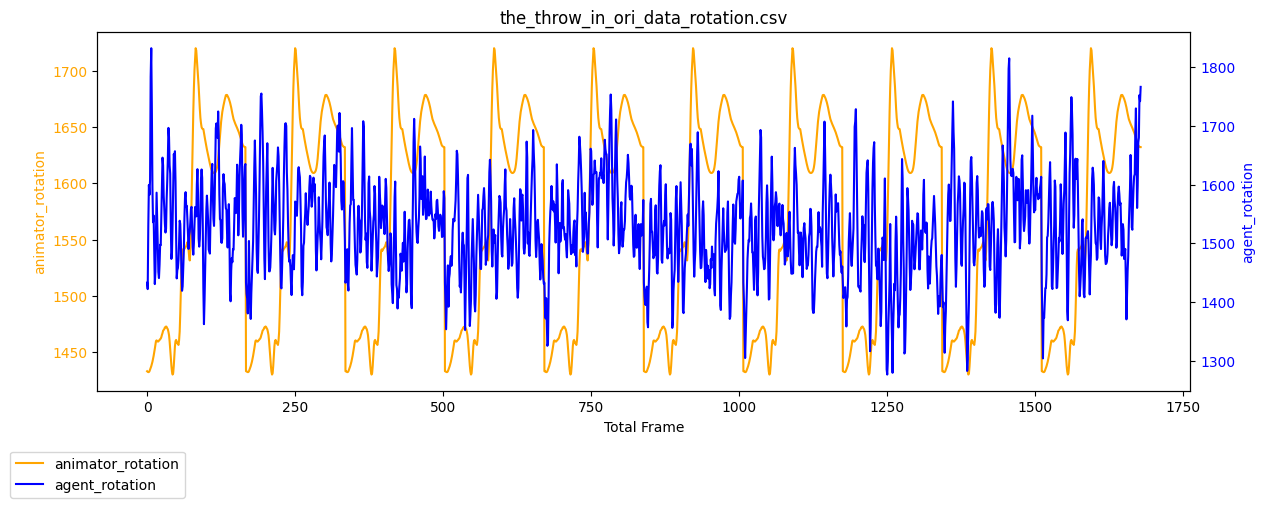

In flat terrain MAPE: 6.34%
Frame per-Episode: 1678    167.8
Name: record_point, dtype: float64


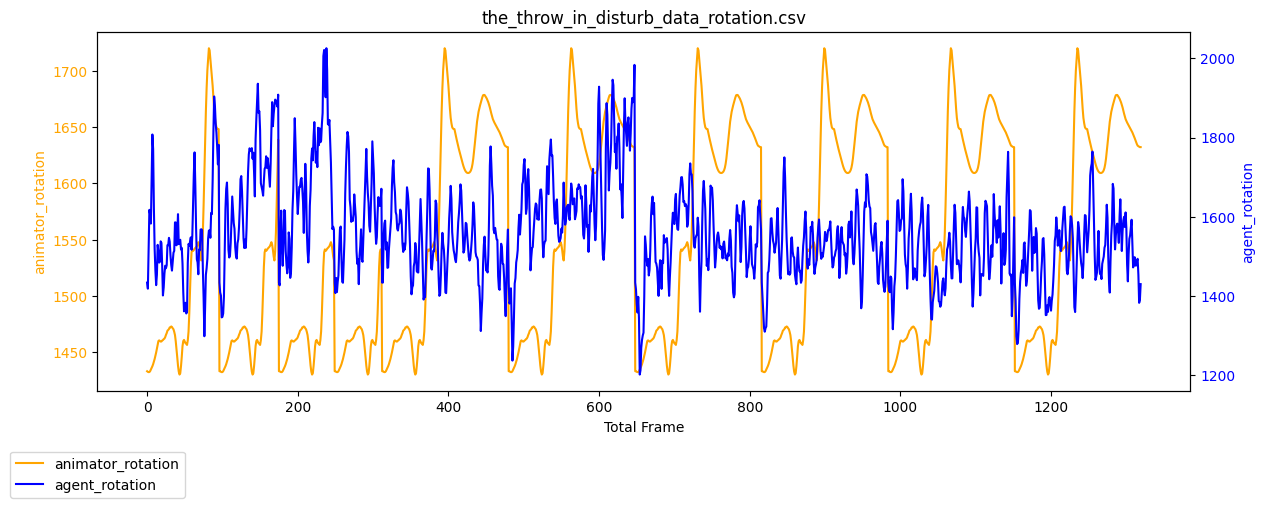

In diturbance MAPE: 7.63%
Frame per-Episode: 1319    131.9
Name: record_point, dtype: float64


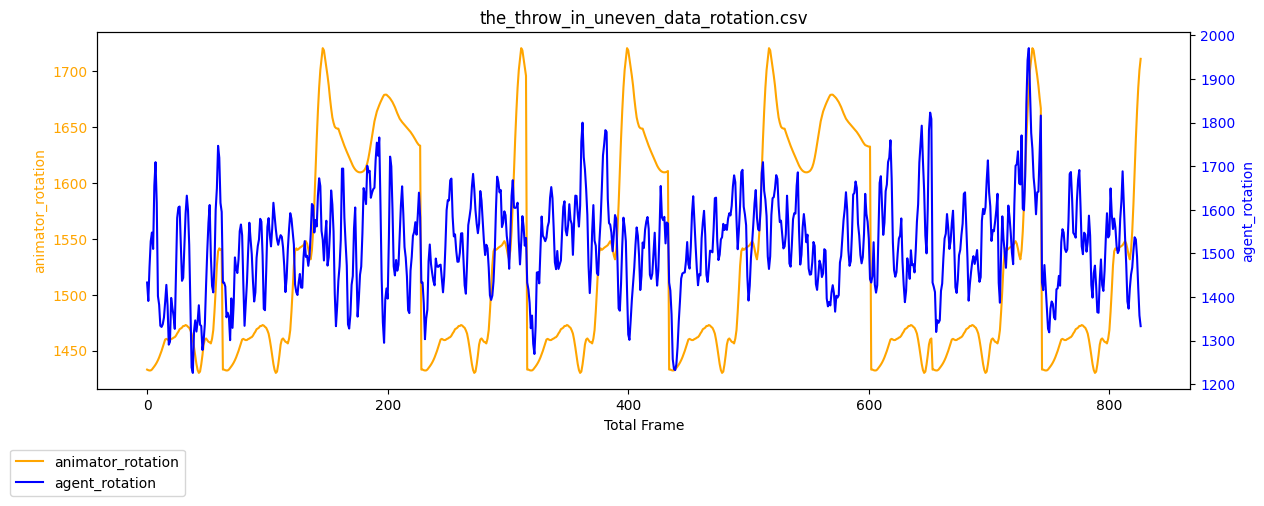

In uneven terrain MAPE: 6.56%
Frame per-Episode: 826    82.6
Name: record_point, dtype: float64


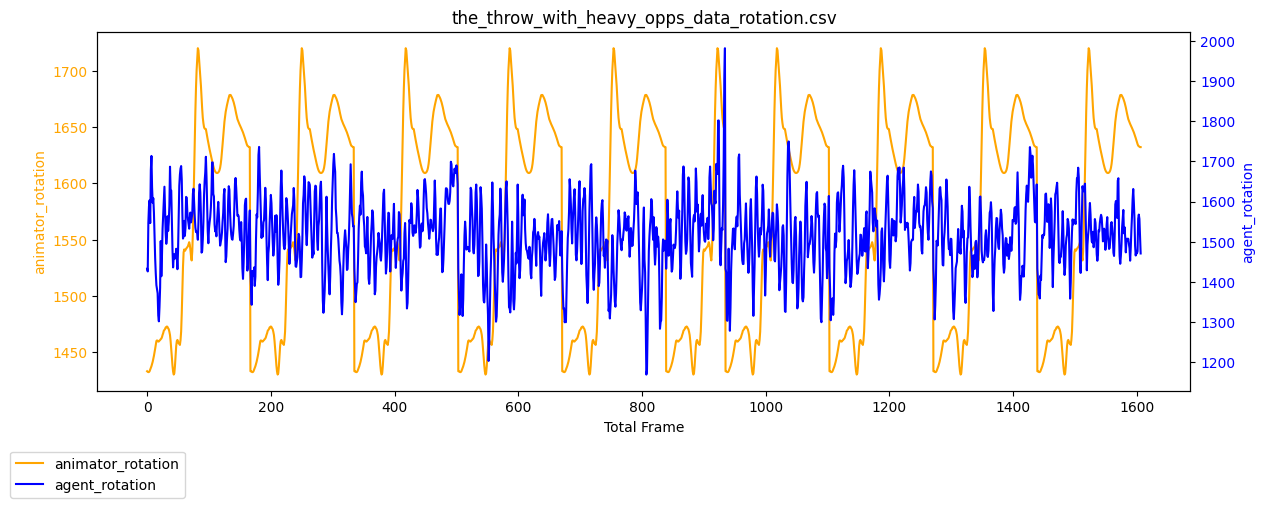

With Heavy Opponent MAPE: 6.74%
Frame per-Episode: 1606    160.6
Name: record_point, dtype: float64


In [99]:
showPlotLine(df_inflat,"the_throw_in_ori_data_rotation.csv")
MAPE(df_inflat,"In flat terrain")
showPlotLine(df_indistrub, "the_throw_in_disturb_data_rotation.csv")
MAPE(df_indistrub, "In diturbance")
showPlotLine(df_inuneven, "the_throw_in_uneven_data_rotation.csv")
MAPE(df_inuneven, "In uneven terrain")
showPlotLine(df_inheavy, "the_throw_with_heavy_opps_data_rotation.csv")
MAPE(df_inheavy, "With Heavy Opponent")